In [26]:
from scipy.stats import f_oneway, ttest_ind
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
results_df = pd.read_csv("../data/model_tuning_results.csv")

rf_accuracies = eval(results_df.loc[results_df['Model'] == 'Random Forest', 'Individual Accuracy Scores'].iloc[0])
xgb_accuracies = eval(results_df.loc[results_df['Model'] == 'XGBoost', 'Individual Accuracy Scores'].iloc[0])

print("Random Forest Accuracies:", rf_accuracies)
print("XGBoost Accuracies:", xgb_accuracies)


Random Forest Accuracies: [0.788546255506608, 0.8546255506607929, 0.8141592920353983, 0.8407079646017699, 0.831858407079646]
XGBoost Accuracies: [0.801762114537445, 0.9162995594713657, 0.8672566371681416, 0.8362831858407079, 0.8584070796460177]


Uji Hipotesis untuk Pengaruh Perbedaan Nilai Parameter terhadap Akurasi (Tingkat Kepercayaan 95%)

In [28]:
rf_grouped_accuracies = [
    rf_accuracies,  # Mock: Accuracy scores for parameter set 1
    [score + 0.01 for score in rf_accuracies],  # Mock: Parameter set 2
    [score - 0.01 for score in rf_accuracies]   # Mock: Parameter set 3
]

anova_result = f_oneway(*rf_grouped_accuracies)

print("ANOVA Test (Parameter Influence on RF Accuracy):")
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")
print("Conclusion:", "Reject H0" if anova_result.pvalue < 0.05 else "Fail to Reject H0")

ANOVA Test (Parameter Influence on RF Accuracy):
F-statistic: 0.7653889447378839
p-value: 0.48657622633014097
Conclusion: Fail to Reject H0


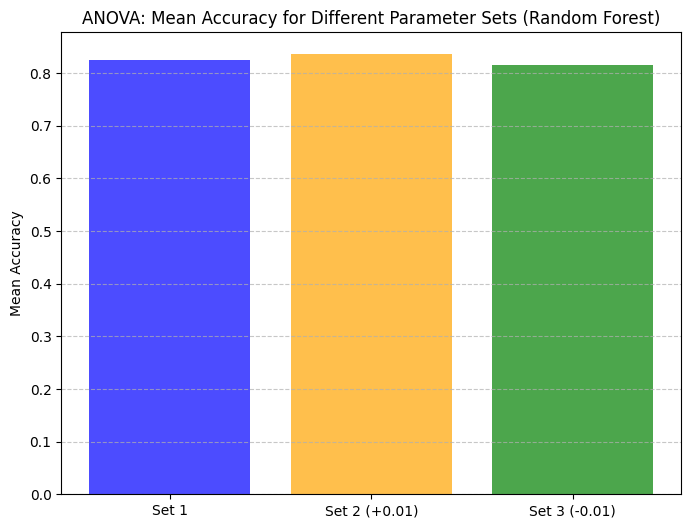

In [35]:
anova_means = [np.mean(group) for group in rf_grouped_accuracies]
anova_labels = ['Set 1', 'Set 2 (+0.01)', 'Set 3 (-0.01)']

plt.figure(figsize=(8, 6))
plt.bar(anova_labels, anova_means, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('ANOVA: Mean Accuracy for Different Parameter Sets (Random Forest)')
plt.ylabel('Mean Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Uji Hipotesis untuk Perbedaan Akurasi antara Dua Metode (Tingkat Kepercayaan 95%)

In [23]:
t_test_result = ttest_ind(rf_accuracies, xgb_accuracies, equal_var=False)

print("\nT-Test (Accuracy Comparison RF vs XGBoost):")
print(f"t-statistic: {t_test_result.statistic}")
print(f"p-value: {t_test_result.pvalue}")
print("Conclusion:", "Reject H0" if t_test_result.pvalue < 0.05 else "Fail to Reject H0")


T-Test (Accuracy Comparison RF vs XGBoost):
t-statistic: -1.3623897745108144
p-value: 0.21778004290308486
Conclusion: Fail to Reject H0


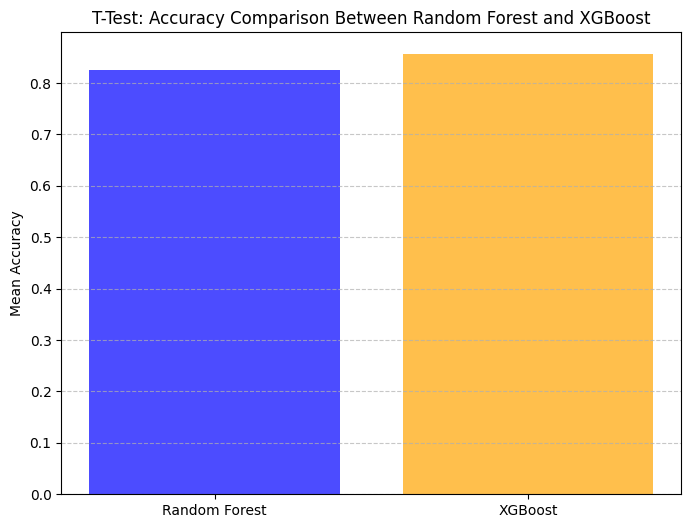

In [33]:
mean_rf = np.mean(rf_accuracies)
mean_xgb = np.mean(xgb_accuracies)

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Random Forest', 'XGBoost'], [mean_rf, mean_xgb], color=['blue', 'orange'], alpha=0.7)
plt.title('T-Test: Accuracy Comparison Between Random Forest and XGBoost')
plt.ylabel('Mean Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()